In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
!pip install ISLP
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=129970f863fb438ad946947992f1ca7de1bf865b8ee297f43d67b90ca4ca9b22
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uni

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC ,
DecisionTreeRegressor as DTR ,
plot_tree ,
export_text)
from sklearn.metrics import (accuracy_score ,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)
from ISLP.bart import BART

# Question 1

Consider a dataset with two predictors - x1 is categorical with levels A, B, and C. x2 is
quantitative with integer values 1 to 100. Explain the “recursive”, “binary”, and “splitting”
parts of the recursive binary splitting algorithm, in the context of these hypothetical data.
Make sure to discuss the concept of node impurity and how it is measured for classification
and regression tress. (10 sentences, max)



The recursive binary splitting method is recursive due to the top-down approach. All of the observations belong in a single region, or the top part of the tree, the process then works its way down the tree until a stopping criterion is reached. It is binary due to creating two new branches as the method works down the tree resulting in a two-branch tree structure. Splitting occurs since the creation of new branches requires the former branch to be 'split' into two new branches. A node is considered 'pure' if all instances belong to the same class. For classification, a node is 'pure' or 0 if all observations belong to a single class like 'A' or 'B'. For a regression tree, impurity is measured through the variance of the target variable, the lower variance equates to more purity. In the example dataset, a node that only had 100 values would be the most pure since that node has no variance. Overall, recursive binary splitting chooses splits that minimize impurity.   

# Question 2

What tuning parameters are important when building a decision tree? How do those choices
relate to the bias/variance trade off? (5 sentences, max)

 The size of lambda is an important consideration for building a decision tree, as seen in the cost complexity pruning method. As lambda increases from zero, the branches become pruned and more predictable, but at the cost of potentially simplifying the data. Lambda is selected by cross-validating the full dataset to obtain the optimal subtree. A smaller tree with few splits tends to have low variance but high bias, while a larger tree may overfit the data, leading to high variance and low bias. By starting with a large tree and adjusting lambda, the bias/variance trade-off can be managed through cost complexity pruning.

# Question 3

Explain the rationale behind the variable importance measures that decision trees provide. (4
sentences, max)

Variable importance measures increase the interpretability of bagging. It is computed by recording the total decrease in RSS through splits over a predictor, averaged over the B trees. A higher value shows that the predictor plays a significant role in improving the model's accuracy. Overall, variable importance measures help with selecting the most relevant predictors in a model.


# Question 4

Explain why bagging, random forests, and boosting improve decision tree performance.

Bagging improves decision tree performance by averaging the number of B trees in an ensemble, resulting in reduced variance for the decision tree model, since each tree has high variance, but low bias. Random Forest forces each split to consider only a subset of predictors (decorrelates), rather than using all of the predictors in bagging, which may be highly correlated. Random forest decorrelates the trees since one strong predictor would result in most of the trees using the strong predictor for the top split. Decorrelating the trees through random forests helps reduce the decision tree's variance. Boosting helps with potential overfitting issues, it learns slowly by growing additional trees sequentially, meaning it uses previously grown trees to create a new tree.

# Question 5

What tuning parameters control the performance of bagging, random forests, and boosting?

For boosting, there are three tuning parameters: the number of B trees, the shrinkage parameter of lambda, and the number of d splits in each tree. Tuning the number of trees helps prevent overfitting, lambda controls the rate of learning, and the number of d splits controls the complexity of the model. For random forest, tuning parameters include the depth of the trees and the number of predictors to sample for each split. As previously stated, the number of predictors to sample reduces the correlation between individual trees which lowers variance, and the depth of the tree helps control the bias/variance trade-off and the complexity of the model. Since bagging is essentially random forest, the tuning parameters are similar. The number of trees is not an important tuning parameter, since many trees won't lead to overfitting. The text states that using B = 100 is good practice for accounting errors.

# Exercise 6

## 1. Basic classification tree for whether income is above or below the median. Tune using cost complexity pruning. Visualize the tree with the chosen cost complexity pruning. Interpret some of the internal and terminal nodes.

In [3]:
# Importing Dataset

from google.colab import files
uploaded = files.upload('ex1.csv')

dat = pd.read_csv('ex1.csv/ex1.csv')

Saving ex1.csv to ex1.csv/ex1.csv


In [4]:
# Converting to categorical



for col in dat.select_dtypes(include=['object']).columns:
    dat[col] = dat[col].astype('category')


In [5]:
#  HighIncome variable


HighIncome = np.where(dat['income'] > dat['income'].median(), "Yes", "No")

In [6]:
dat.columns

Index(['income', 'hrs_work', 'race', 'age', 'gender', 'citizen',
       'time_to_work', 'lang', 'married', 'edu', 'disability', 'birth_qrtr'],
      dtype='object')

In [7]:
# Model and feature

model = MS(dat.columns.drop('income'), intercept=False)

D = model.fit_transform(dat)



In [8]:
# feature

feature_names = list(D.columns)

X = np.asarray(D)

In [9]:
# Decision Tree

clf = DTC(criterion='entropy',
max_depth=3,
random_state=0)
clf.fit(X, HighIncome)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [10]:
# Training and test set, I used a test size of .5 to mimic the ISLP lab code.

(X_train,
X_test,
High_train,
High_test) = skm.train_test_split(X,
HighIncome,
test_size=0.5,
random_state=0)

In [11]:
# Fit the tree on training set

clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train , High_train)
accuracy_score(High_test , clf.predict(X_test))

0.7270408163265306

In [12]:
# Cost Compelxity Pruning

ccp_path = clf.cost_complexity_pruning_path(X_train , High_train)
kfold = skm.KFold(10,
random_state=1,
shuffle=True)

ccp_path

{'ccp_alphas': array([0.        , 0.00309046, 0.00354356, 0.00406484, 0.00414976,
        0.00498738, 0.00498738, 0.00502574, 0.00511509, 0.00538847,
        0.00547752, 0.00615454, 0.00635013, 0.00642056, 0.00643712,
        0.00646886, 0.00679065, 0.00696364, 0.00704575, 0.00704575,
        0.00704575, 0.00704575, 0.00704575, 0.00772614, 0.00822587,
        0.00829952, 0.00840732, 0.00874955, 0.00886267, 0.00891611,
        0.00943879, 0.00974565, 0.01116812, 0.01118241, 0.0121857 ,
        0.01277286, 0.01350808, 0.01411535, 0.01957877, 0.03433104,
        0.06677915, 0.07271714, 0.16409117]),
 'impurities': array([0.        , 0.01545229, 0.02253941, 0.02660425, 0.05150282,
        0.06147758, 0.07145235, 0.0764781 , 0.08159319, 0.13008939,
        0.13556691, 0.15403055, 0.16673081, 0.17315136, 0.19246271,
        0.19893157, 0.20572223, 0.21268587, 0.21973162, 0.22677737,
        0.24086886, 0.24791461, 0.25496036, 0.27041265, 0.31976784,
        0.33636688, 0.37840349, 0.38715303

In [13]:
# Extract optimal

grid = skm.GridSearchCV(clf ,
{'ccp_alpha': ccp_path.ccp_alphas},
refit=True ,cv=kfold ,
scoring='accuracy')
grid.fit(X_train , High_train)
grid.best_score_

0.7829487179487179

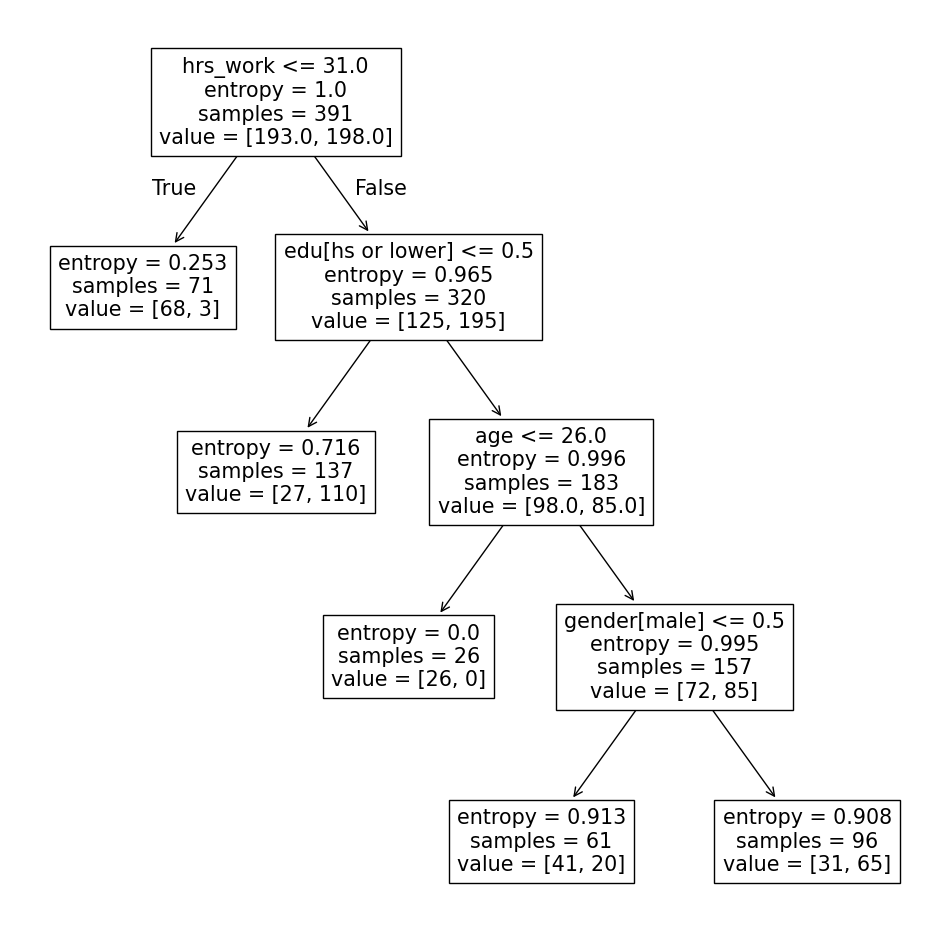

In [14]:
# View pruned tree

ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_ ,
feature_names=feature_names ,
ax=ax);

The hours worked per week variable seems to be a strong predictor for the high-income target variable. For hours worked equal to and less than 31 hours, 71 samples were true, or met the requirement from the first split. 68 of the 71 samples were "yes" and "3" were no. The entropy value of .253 suggests a fairly pure node, meaning the model is good at classifying those observations for that node. For the second false branch split, the education level of high school and lower was also significant for classifying high income and so were hours worked per week greater than 31. There were 320 observations sampled, with 125 "yes" and "195" no values. The entropy score of .965 is very high, suggesting that the model is uncertain in its classification. For the true third split, where hours worked per week are equal to and less than 31 and an education level equal to a bachelor's degree, there were 137 observations sampled, with 27 "yes" and 110 "no" values. The entropy score of .716 suggests a high level of uncertainty in classifying the observations for true values in the third split.

In [15]:
# Prune tree more

best_.tree_.n_leaves

5

The tree with 5 terminal nodes results in the lowest cross-validation errror rate, with an accuracy score of 78.3%.

## 2. Bagged classification trees for whether income is above or below the median. Try different numbers of trees. Report the test errors.

In [16]:
# Split data again

(X_train ,
X_test ,
High_train ,
High_test) = skm.train_test_split(X,
HighIncome,
test_size=0.3,
random_state=0)

In [17]:
# Convert "yes" and "no" to 1 and 0 (numeric values)

High_train = np.where(High_train == "Yes", 1, 0)
High_test = np.where(High_test == "Yes", 1, 0)

In [18]:
# Bagging

bag_dat = RF(max_features=X_train.shape[1], random_state=0)
bag_dat.fit(X_train , High_train)

RandomForestRegressor(max_features=16, random_state=0)

0.1705723404255319

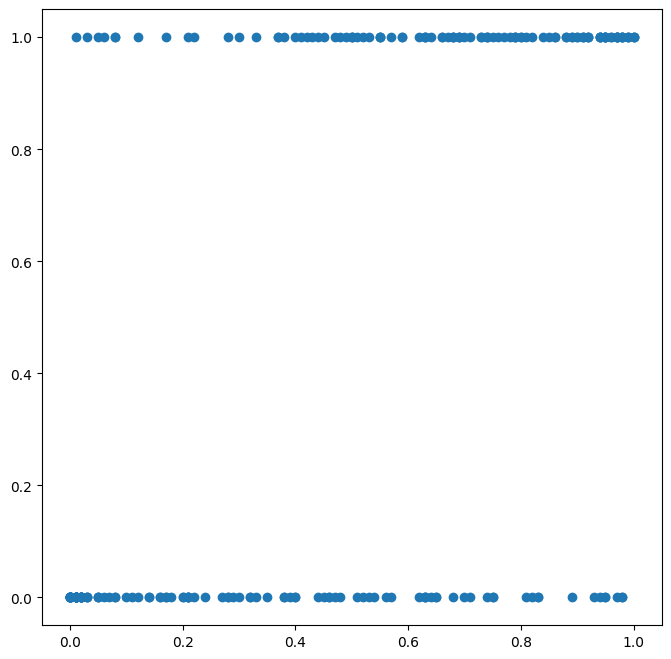

In [19]:
# Test set MSE and plot

ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_dat.predict(X_test)
ax.scatter(y_hat_bag , High_test)
np.mean((High_test - y_hat_bag)**2)

The predicted values fall along the x-axis, while the actual values are on the y-axis. 0 is representing not high income, while 1 is considered high income. It appears that the model is good at predicting high and not high income as seen with the amount of points clustered around the x and y values of 1 and the x and y values of 0. The 0,0 mark indicates high confidence in predicting lower income, while the 1,1 mark indicates high confidence in predicting high income. There are some errors with the predictions, as seen with the varying points across the x-axis, however, the clustering at 0,0 and 1,1 suggests a high-performing model.

In [20]:
# change number of trees grown to 500

bag_dat = RF(max_features=X_train.shape[1],
n_estimators=500,
random_state=0).fit(X_train , High_train)
y_hat_bag = bag_dat.predict(X_test)
np.mean((High_test - y_hat_bag)**2)

0.17003537021276596

In [21]:
# change number of trees grown to 1,000

bag_dat = RF(max_features=X_train.shape[1],
n_estimators=1000,
random_state=0).fit(X_train , High_train)
y_hat_bag = bag_dat.predict(X_test)
np.mean((High_test - y_hat_bag)**2)

0.1697424680851064

In [22]:
# change number of trees grown to 50

bag_dat = RF(max_features=X_train.shape[1],
n_estimators=50,
random_state=0).fit(X_train , High_train)
y_hat_bag = bag_dat.predict(X_test)
np.mean((High_test - y_hat_bag)**2)

0.17230638297872342

I used the standard 100 trees, 500 trees, 1,000 trees, and 50 trees bagging methods. They all had very similar MSE scores, with the 1,000 trees bagging approach obtaining the lowest test MSE of .169. However, all of the MSE values were essentially the same.

## 3. Random forests for classification of whether income is above or below the median. Try some different numbers of trees and different values of 𝑚. Report the test errors. Calculate feature importance.

In [23]:
# RF with 6 features and 200 trees, output is test MSE

RF_bag = RF(max_features=6,
            n_estimators= 200,
random_state=0).fit(X_train , High_train)
y_hat_RF = RF_bag.predict(X_test)
np.mean((High_test - y_hat_RF)**2)

0.16272851063829788

In [24]:
# RF with 10 features and 500 trees, output is test MSE

RF_bag = RF(max_features=10,
            n_estimators= 500,
random_state=0).fit(X_train , High_train)
y_hat_RF = RF_bag.predict(X_test)
np.mean((High_test - y_hat_RF)**2)

0.16610023829787235

In [25]:
# RF with 3 features and 1,000 trees, output is test MSE


RF_bag = RF(max_features=3,
            n_estimators= 1000,
random_state=0).fit(X_train , High_train)
y_hat_RF = RF_bag.predict(X_test)
np.mean((High_test - y_hat_RF)**2)

0.1603603531914894

In [26]:
# Feature importance

feature_imp = pd.DataFrame(
{'importance':RF_bag.feature_importances_},
index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
age,0.244633
hrs_work,0.226660
time_to_work,0.145296
edu[hs or lower],0.075105
gender[male],0.064533
married[yes],0.049088
disability[yes],0.025473
lang[other],0.024637
birth_qrtr[oct thru dec],0.023700
edu[grad],0.023611


The age, hours worked per week, and time to work in minutes were the three most important variables for the response variable of median income. This makes sense as age usually means how much seniority you have for a job and hours worked per week are directly related to income. Time to work in minutes is less direct, however, I imagine that people who have the means would likely live closer to their workplace than people who do not have a choice.

For the test MSE values, the random forest with three features and 1,000 trees technically had the lower MSE value. However, all three test MSEs were .001 off of each other, so the difference is negligible. The higher number of trees was likely the reason for a slightly lower MSE value, but the 200 trees random forest model achieved almost the same MSE value.

## 4. Boosted classification trees for whether income is above or below the median. Try different learning rates and assess whether this makes a difference in test error performance. Use tree depth of 1.

In [27]:
# boosted model with general learning rate

boost_dat = GBR(n_estimators=5000,
learning_rate =0.001,
max_depth=1,
random_state=0)
boost_dat.fit(X_train , High_train)

GradientBoostingRegressor(learning_rate=0.001, max_depth=1, n_estimators=5000,
                          random_state=0)

In [28]:
# test error MSE for general model learning rate (.001)

y_hat_boost = boost_dat.predict(X_test);
np.mean((High_test - y_hat_boost)**2)

0.16042342873155335

In [29]:
# boosted model with learning rate .3

boost_dat = GBR(n_estimators=5000,
learning_rate =0.3,
max_depth=1,
random_state=0)
boost_dat.fit(X_train , High_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=1, n_estimators=5000,
                          random_state=0)

In [30]:
# test error MSE for model with learning rate .3

y_hat_boost = boost_dat.predict(X_test);
np.mean((High_test - y_hat_boost)**2)

0.17593529312193917

In [31]:
# boosted model with learning rate .5

boost_dat = GBR(n_estimators=5000,
learning_rate =0.5,
max_depth=1,
random_state=0)
boost_dat.fit(X_train , High_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=1, n_estimators=5000,
                          random_state=0)

In [32]:
# test error MSE for model with learning rate .5

y_hat_boost = boost_dat.predict(X_test);
np.mean((High_test - y_hat_boost)**2)

0.18188247561091325

As the learning rate increases or the lambda increases, the test MSE slightly increases. It seems that the increased rate of learning does not significantly affect the error. A .3 learning rate yielded a .18 MSE while a learning rate of .001 yielded a .16 MSE. Based on this, the different learning rates do not make much of a difference in test performance.

# References

CHAT GPT

Gemini

Brian Perlman